In [71]:
#use pandas to import dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('checkoutstimeseries.csv')
df.head


<bound method NDFrame.head of      Unnamed: 0  Year-Month    BOOK   EBOOK  SOUNDDISC  VIDEODISC  AUDIOBOOK  \
0             0  2005-04-01  143053       0      37432      32157          0   
1             1  2005-05-01  227864       0      58138      53305          0   
2             2  2005-06-01  287908       0      70580      67821          0   
3             3  2005-07-01  195018       0      49752      48457          0   
4             4  2005-08-01  210033       0      55664      53192          0   
..          ...         ...     ...     ...        ...        ...        ...   
228         228  2024-04-01  232015  258261      13424      44527     221409   
229         229  2024-05-01       0       0          0          0          0   
230         230  2024-06-01       0       0          0          0          0   
231         231  2024-07-01   82917  225241       2567      11869     195156   
232         232  2024-08-01  182940  240663       8698      31273     209228   

     Othe

First plot to get an idea of the variables

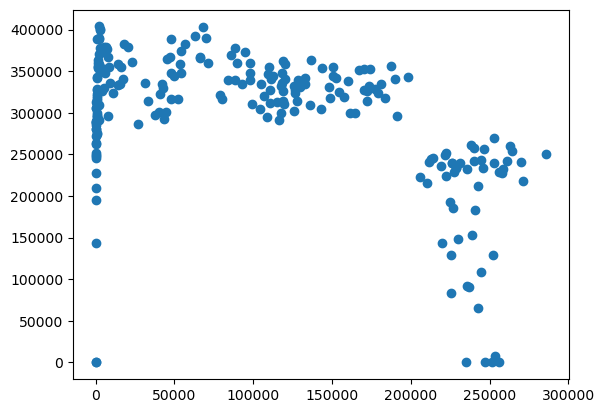

In [72]:
X = df['EBOOK']
y = df['BOOK']
plt.scatter(X,y)


Now do a Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [74]:
## Now we fit the model
## this is typically model.fit(X, y)
## NOTE! X has to be a 2D array, think matrix or column vector
## either use X[['Length']] or X['Length'].reshape(-1,1)
X = df[['EBOOK']]
model.fit(X, y)

LinearRegression()

Subtract out the trend(subtracting linear regression fit from every data point)

In [75]:
slope = model.coef_[0]
intercept = model.intercept_

# Print the equation of the regression line
print(f"y = {slope:.2f}x + {intercept:.2f}")

y = -0.44x + 340574.81


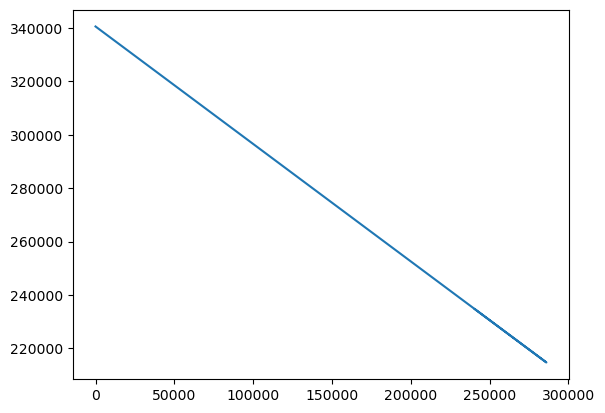

In [76]:
#plot the model with the scatterplot
y_predicted =slope*X + intercept 
plt.plot(X,y_predicted)

In [77]:
#create a new column to fill
df.insert(2, "",  'BOOKSubtractedTrend',0)

In [80]:
#Subtract off the line we now have from each data point into a new column
for i in range(len(df)):
   #find the predicted y value
    y_actual = df['BOOK'].iloc[i]
    y_predicted = slope*df['EBOOK'].iloc[i]+intercept
    df['BOOKSubtractedTrend'].iloc[i] = y_actual - y_predicted
                                                
y_new = df['BOOKSubtractedTrend']


KeyError: 'BOOKSubtractedTrend'

In [81]:
plt.scatter(X,y_new)

NameError: name 'y_new' is not defined